# TECHNOCOLABS 

## Predicting Stock Prices for Large Cap Technology Companies DS II

## Company Opted for Predicting the Stock Prices : APPLE

_______________________________________________________________________________________________________________________________

# Exploratory Data Analysis On Historical Data of APPLE

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Load the Data

In [ ]:
df=pd.read_csv('HistoricalData_APPLE.csv')

In [ ]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$127.13,56877940,$127.21,$127.75,$126.52
1,06/08/2021,$126.74,74403770,$126.6,$128.46,$126.2101
2,06/07/2021,$125.9,71057550,$126.17,$126.32,$124.8321
3,06/04/2021,$125.89,75169340,$124.07,$126.16,$123.85
4,06/03/2021,$123.54,76229170,$124.68,$124.85,$123.13


In [ ]:
df.tail()

,Date,Close/Last,Volume,Open,High,Low
2511,06/16/2011,$11.6129,507299317,$11.675,$11.7386,$11.3689
2512,06/15/2011,$11.6696,395841722,$11.7768,$11.7964,$11.6029
2513,06/14/2011,$11.8729,333995906,$11.7857,$11.9018,$11.7611
2514,06/13/2011,$11.6643,329376468,$11.6857,$11.7254,$11.6096
2515,06/10/2011,$11.6393,433801306,$11.8054,$11.845,$11.6254


In [ ]:
df.shape

(2516, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2516 non-null   object
 1   Close/Last  2516 non-null   object
 2   Volume      2516 non-null   int64 
 3   Open        2516 non-null   object
 4   High        2516 non-null   object
 5   Low         2516 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


### Convert the Data

In [ ]:
df.rename(columns = {"Close/Last": "Close"}, inplace=True)

In [ ]:
df['Close'] = df['Close'].str.replace('$', '')
df['Close'] = df['Close'].astype('float')

In [ ]:
df['Open'] = df['Open'].str.replace('$', '')
df['Open'] = df['Open'].astype('float')

In [ ]:
df['High'] = df['High'].str.replace('$', '')
df['High'] = df['High'].astype('float')

In [ ]:
df['Low'] = df['Low'].str.replace('$', '')
df['Low'] = df['Low'].astype('float')

In [ ]:
df['Volume'] = df['Volume'].astype('float')

In [ ]:
from datetime import datetime
con=df['Date']
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
#check datatype of index
df.index

DatetimeIndex(['2021-06-09', '2021-06-08', '2021-06-07', '2021-06-04',
               '2021-06-03', '2021-06-02', '2021-06-01', '2021-05-28',
               '2021-05-27', '2021-05-26',
               ...
               '2011-06-23', '2011-06-22', '2011-06-21', '2011-06-20',
               '2011-06-17', '2011-06-16', '2011-06-15', '2011-06-14',
               '2011-06-13', '2011-06-10'],
              dtype='datetime64[ns]', name='Date', length=2516, freq=None)

In [ ]:
df.dtypes

Close     float64
Volume    float64
Open      float64
High      float64
Low       float64
dtype: object

In [ ]:
df

,Close,Volume,Open,High,Low
Date,,,,,
2021-06-09,127.1300,56877940.0,127.2100,127.7500,126.5200
2021-06-08,126.7400,74403770.0,126.6000,128.4600,126.2101
2021-06-07,125.9000,71057550.0,126.1700,126.3200,124.8321
2021-06-04,125.8900,75169340.0,124.0700,126.1600,123.8500
2021-06-03,123.5400,76229170.0,124.6800,124.8500,123.1300
...,...,...,...,...,...
2011-06-16,11.6129,507299317.0,11.6750,11.7386,11.3689
2011-06-15,11.6696,395841722.0,11.7768,11.7964,11.6029
2011-06-14,11.8729,333995906.0,11.7857,11.9018,11.7611


In [ ]:
df.head()

,Close,Volume,Open,High,Low
Date,,,,,
2021-06-09,127.13,56877940.0,127.21,127.75,126.5200
2021-06-08,126.74,74403770.0,126.60,128.46,126.2101
2021-06-07,125.90,71057550.0,126.17,126.32,124.8321
2021-06-04,125.89,75169340.0,124.07,126.16,123.8500
2021-06-03,123.54,76229170.0,124.68,124.85,123.1300


### Understand the Data

In [ ]:
df.columns

Index(['Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [ ]:
df.isnull().sum()

Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

<AxesSubplot:ylabel='Date'>

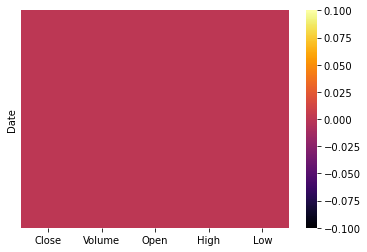

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='inferno')

#### As we don't have any null values in our data set we can move forward for further procedures

In [ ]:
df.describe()

,Close,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,41.277389,2.388826e+08,41.268871,41.698470,40.829849
std,30.304841,1.914594e+08,30.319067,30.698585,29.893474
min,11.261400,4.544820e+07,11.310000,11.346400,11.089300
25%,21.215550,1.092658e+08,21.244100,21.423600,20.992800
50%,29.592500,1.679334e+08,29.505000,29.810000,29.281250
75%,47.733750,3.022477e+08,47.770625,47.996250,47.371250
max,143.160000,1.498071e+09,143.600000,145.090000,141.370000


In [ ]:
df.nunique()

Close     2414
Volume    2513
Open      2406
High      2395
Low       2409
dtype: int64

In [ ]:
# To check weather there is any duplicate row in the dataset
df.duplicated().sum()

0

In [ ]:
#Correlation Between Variables
df.corr()

,Close,Volume,Open,High,Low
Close,1.000000,-0.429948,0.999656,0.999820,0.999823
Volume,-0.429948,1.000000,-0.428714,-0.426292,-0.432983
Open,0.999656,-0.428714,1.000000,0.999857,0.999795
High,0.999820,-0.426292,0.999857,1.000000,0.999746
Low,0.999823,-0.432983,0.999795,0.999746,1.000000


<AxesSubplot:>

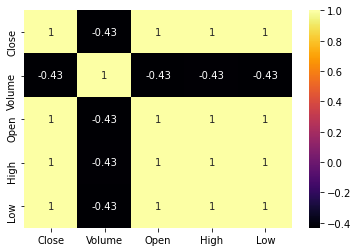

In [ ]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='inferno')

#### Every attributes except Volume has a perfect Positive Correlation, i.e they move in same direction together

In [ ]:
# Covariance of columns
df.cov()

,Close,Volume,Open,High,Low
Close,9.183834e+02,-2.494622e+09,9.184987e+02,9.301481e+02,9.057568e+02
Volume,-2.494622e+09,3.665672e+16,-2.488627e+09,-2.505548e+09,-2.478129e+09
Open,9.184987e+02,-2.488627e+09,9.192458e+02,9.306190e+02,9.061560e+02
High,9.301481e+02,-2.505548e+09,9.306190e+02,9.424031e+02,9.174545e+02
Low,9.057568e+02,-2.478129e+09,9.061560e+02,9.174545e+02,8.936198e+02


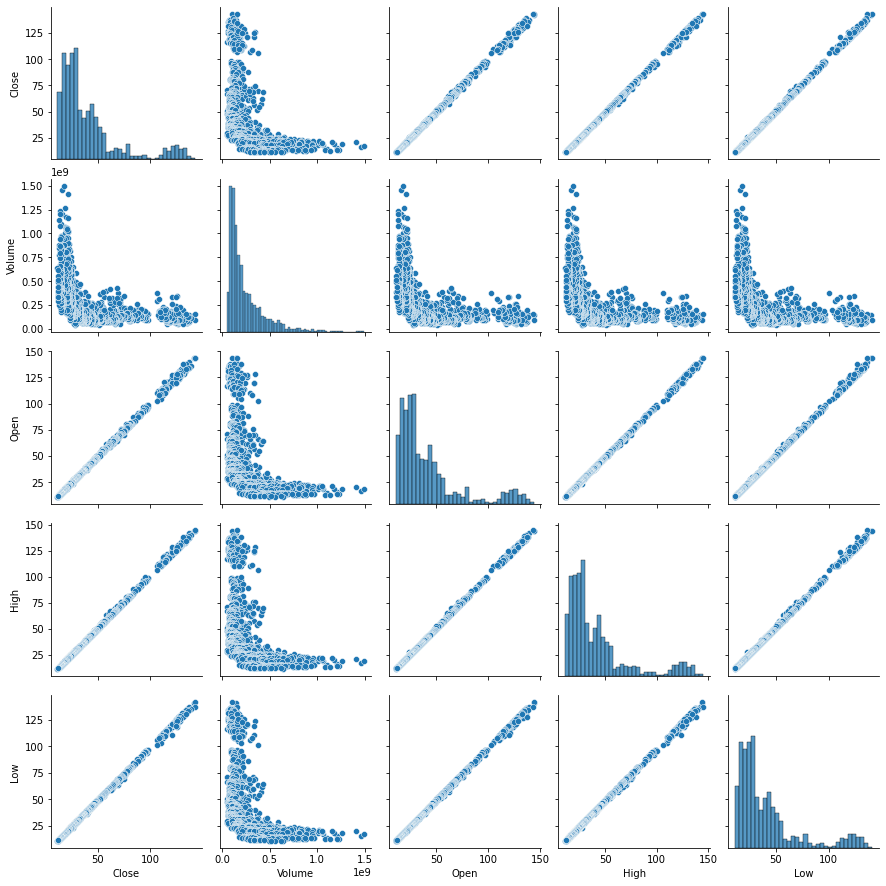

In [ ]:
sns.pairplot(df)

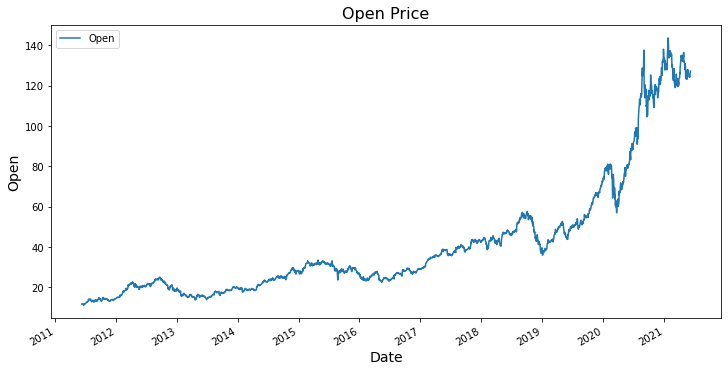

In [ ]:
# Historical view of the Opening price
df['Open'].plot(legend=True, figsize = (12, 6))
plt.title("Open Price", fontsize=16)
plt.ylabel('Open', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.show()

#### Opening Price seems to have a Increasing trend comapred to the previous years 

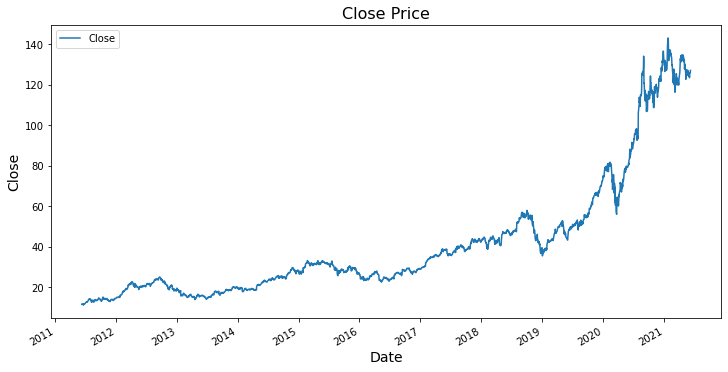

In [ ]:
# Historical view of the closing price
df['Close'].plot(legend=True, figsize = (12, 6))
plt.title("Close Price", fontsize=16)
plt.ylabel('Close', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.show()

#### Closing Price also has a Increasing trend like Opening Price

<AxesSubplot:title={'center':'Open Price & Close Price'}, xlabel='Close', ylabel='Open'>

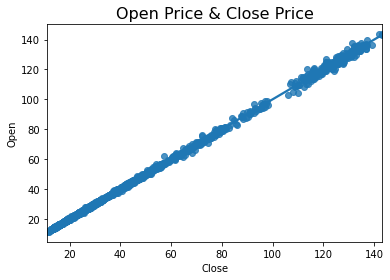

In [ ]:
#regression line showing the relationship between 'Open Price' and 'Close Price'
plt.title("Open Price & Close Price", fontsize=16)
sns.regplot(x=df['Close'], y=df['Open'])

#### Open Price & Close Price has a Positive Correlation

High in Blue, Low in Orange


<AxesSubplot:title={'center':'High Prices vs Low Prices'}>

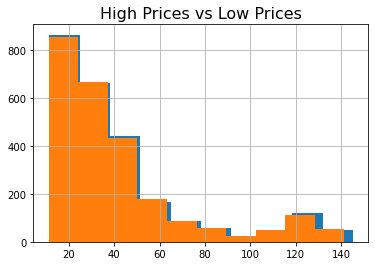

In [ ]:
plt.title("High Prices vs Low Prices", fontsize=16)
print("High in Blue, Low in Orange")
df['High'].hist()
df['Low'].hist()

<AxesSubplot:title={'center':'Highest Price & Lowest Price'}, xlabel='High', ylabel='Low'>

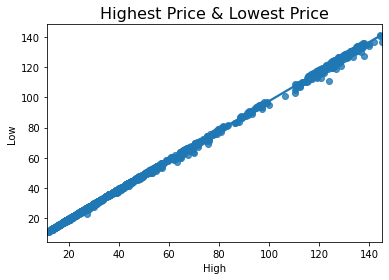

In [ ]:
#regression line showing the relationship between 'Highest Price' and 'Lowest Price'
plt.title("Highest Price & Lowest Price", fontsize=16)
sns.regplot(x=df['High'], y=df['Low'])

#### Highest Price & Lowest Price has a Positive Correlation

In [ ]:
df1=df.copy()

In [ ]:
# HL is the difference between High Price & Low Price
df1['HL']=df1['High']-df1['Low']

In [ ]:
# OC is the difference between Opening Price & Closing Price
df1['OC']=df['Open']-df1['Close']

In [ ]:
df1

,Close,Volume,Open,High,Low,HL,OC
Date,,,,,,,
2021-06-09,127.1300,56877940.0,127.2100,127.7500,126.5200,1.2300,0.0800
2021-06-08,126.7400,74403770.0,126.6000,128.4600,126.2101,2.2499,-0.1400
2021-06-07,125.9000,71057550.0,126.1700,126.3200,124.8321,1.4879,0.2700
2021-06-04,125.8900,75169340.0,124.0700,126.1600,123.8500,2.3100,-1.8200
2021-06-03,123.5400,76229170.0,124.6800,124.8500,123.1300,1.7200,1.1400
...,...,...,...,...,...,...,...
2011-06-16,11.6129,507299317.0,11.6750,11.7386,11.3689,0.3697,0.0621
2011-06-15,11.6696,395841722.0,11.7768,11.7964,11.6029,0.1935,0.1072
2011-06-14,11.8729,333995906.0,11.7857,11.9018,11.7611,0.1407,-0.0872


Text(0.5, 0, 'Date')

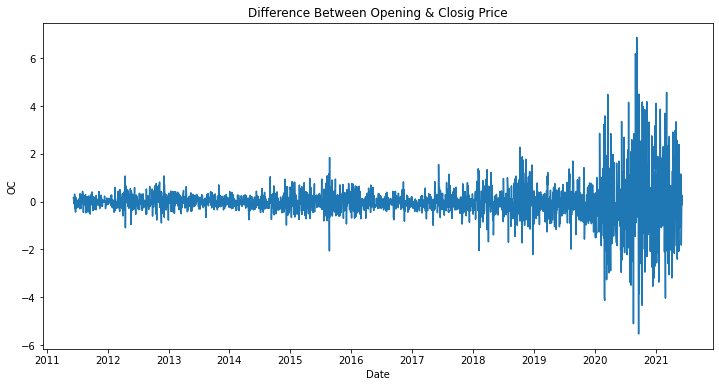

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Difference Between Opening & Closig Price")
sns.lineplot(data=df1['OC'])
plt.xlabel("Date")

#### From 2019 we could see High Difference between the Opening Price & Closing Price compared to previous years

Text(0.5, 0, 'Date')

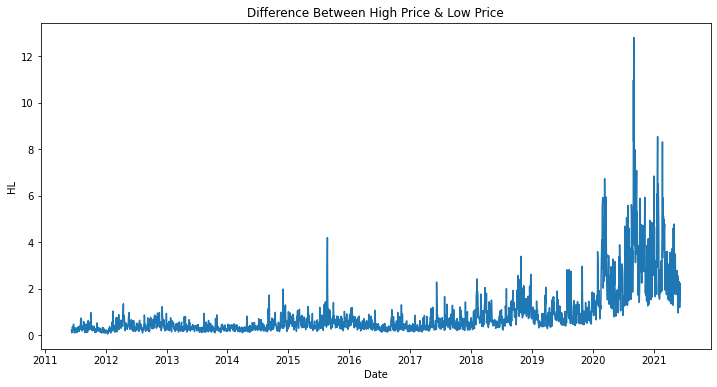

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Difference Between High Price & Low Price")
sns.lineplot(data=df1['HL'])
plt.xlabel("Date")

#### 2020 & 2021 has a huge Difference between the Highest & Lowest Price of Stock

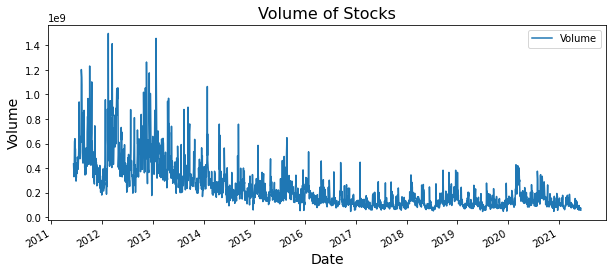

In [ ]:
# Total volume of stock being traded each day over the years
df['Volume'].plot(legend=True,figsize=(10,4))
plt.title("Volume of Stocks", fontsize=16)
plt.ylabel('Volume', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.show()

<AxesSubplot:xlabel='Volume', ylabel='Density'>

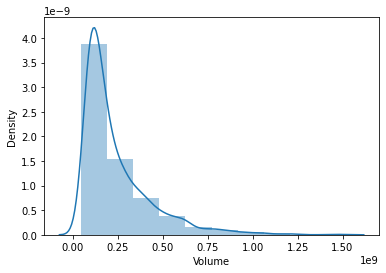

In [ ]:
sns.distplot(df['Volume'],bins=10)

#### Volume of Stocks is having a Decreasing Trend

_______________________________________________________________________________________________________________________________

### Comparison using Average Values

In [ ]:
# 7 Day Rolling Mean
df.rolling(7).mean().head(20)

,Close,Volume,Open,High,Low
Date,,,,,
2021-06-09,NaN,NaN,NaN,NaN,NaN
2021-06-08,NaN,NaN,NaN,NaN,NaN
2021-06-07,NaN,NaN,NaN,NaN,NaN
2021-06-04,NaN,NaN,NaN,NaN,NaN
2021-06-03,NaN,NaN,NaN,NaN,NaN
2021-06-02,NaN,NaN,NaN,NaN,NaN
2021-06-01,125.505714,6.866482e+07,125.441429,126.304286,124.647457
2021-05-28,125.145714,7.072670e+07,125.207143,126.025714,124.366029
2021-05-27,124.937143,7.361554e+07,125.184286,125.908571,124.204586


<AxesSubplot:xlabel='Date'>

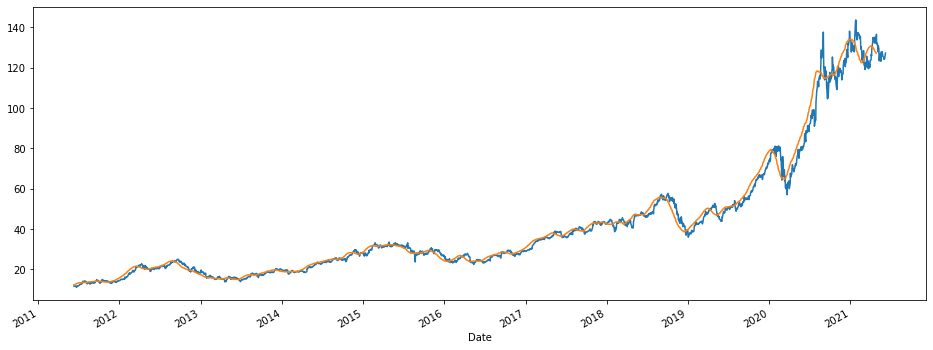

In [ ]:
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

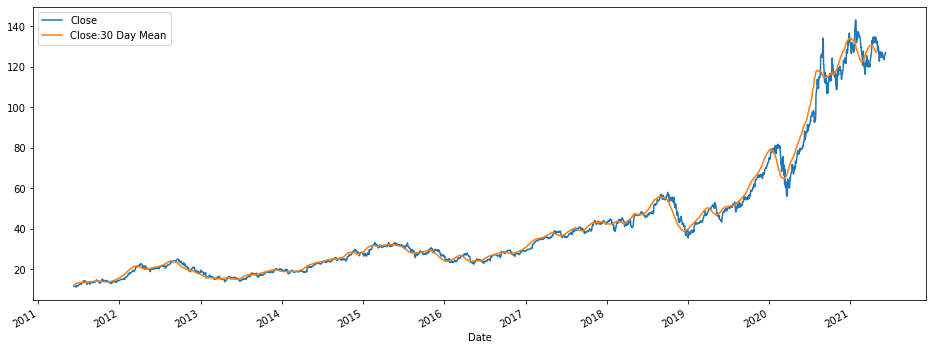

In [ ]:
df2=df.copy()
df2['Close:30 Day Mean']=df['Close'].rolling(window=30).mean()
df2[['Close','Close:30 Day Mean']].plot(figsize=(16,6))

##### Moving Average - MA: A trend-following, or lagging, indicator based on past prices.

In [ ]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df2[column_name]=pd.DataFrame.rolling(df2['Close'],ma).mean()

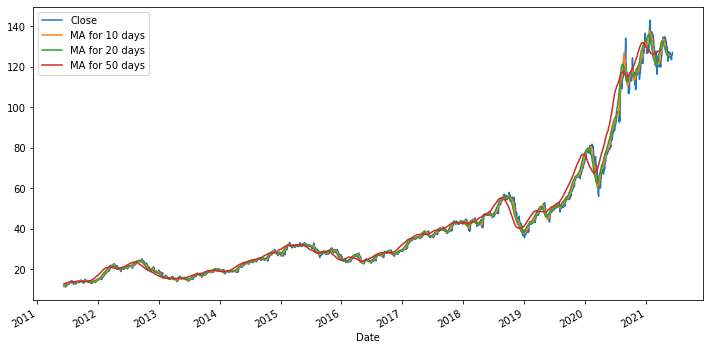

In [ ]:
df2[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

##### Daily Return Analysis:Daily changes of the stock

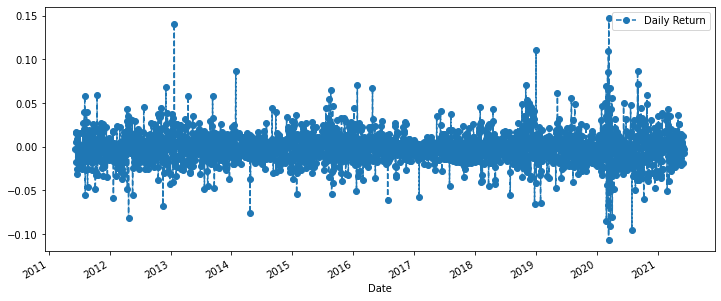

In [ ]:
df2['Daily Return'] = df2['Close'].pct_change()
# plot the daily return percentage
df2['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

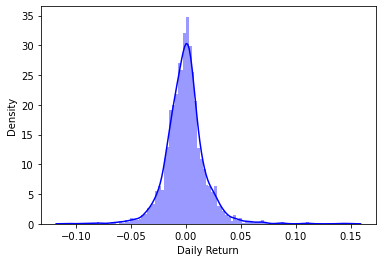

In [ ]:
# Average daily return
sns.distplot(df2['Daily Return'].dropna(),bins=100,color='blue')
plt.show()

#### Average Daily Return is having a very samll value

_______________________________________________________________________________________________________________________________

### Observations

#### Every attributes has a perfect Positive Correlation
#### Volume has a Negative Correlation

#### Opening Price & Closing Price have a Increasing trend and a Positive Corelation
#### High & Low Price also have a Positive Corelation

#### From 2019 we could see High Difference between the Opening Price & Closing Price compared to previous years

#### 2020 & 2021 has a huge Difference between the Highest & Lowest Price of Stock

#### Voulme of Stocks has a Decreasing Trend

#### Daily Return is very Low

### Conclusions

#### Voume of Stcoks is Decreasing each Year but the Opening Price as well as Closing Price is Increasing Similarly

_______________________________________________________________________________________________________________________________